<a href="https://colab.research.google.com/github/Prasadkpd/SCS3201-Machine-Learning---Assignment-01/blob/master/SCS3201_Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SCS3201 Machine Learning and Neural Computing
## Assignment 01





# 1.   Multivariate Linear Regression

## • Selection and a brief introduction to the data sets
---
The data set below was obtained from the UCI ML Repository. For about 4.5 months, the data set has been set to 10 minutes. A ZigBee wireless sensor network was used to monitor the temperature and humidity levels in the house. Each wireless node transmitted the temperature and humidity levels every 3.3 minutes. The wireless data was then averaged over 10-minute intervals. m-bus energy meters were used to record energy data every 10 minutes. The nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set on Reliable Prognosis (rp5.ru) and merged with the experimental data sets using the date and time columns.

Selected Dataset [https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv)

## • The objective of each task 
---
Experiment data is being used to build regression models of appliance energy consumption in a low-energy building. To be more specific, the energy consumption in Wh lights varies with changes in temperature, windspeed, humidity, visibility, and so on.



## • Data preprocessing

---


In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Importing data set from UCI
dataFile = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv'

In [ ]:
# Read data from the file
data = pd.read_csv(dataFile,header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
1,2016-01-11 17:00:00,60,30,19.890000000000001,47.596666666666700,19.199999999999999,44.789999999999999,19.789999999999999,44.729999999999997,19.000000000000000,...,17.033333333333299,45.530000000000001,6.5999999999999996e+00,733.50000000000000,92.000000000000000,7.00000000000000000,63.0000000000000000,5.2999999999999998e+00,13.2754331571049988270,13.2754331571049988270
2,2016-01-11 17:10:00,60,30,19.890000000000001,46.693333333333300,19.199999999999999,44.722499999999997,19.789999999999999,44.789999999999999,19.000000000000000,...,17.066666666666698,45.560000000000002,6.4833333333333298e+00,733.60000000000002,92.000000000000000,6.66666666666666963,59.1666666666666998,5.2000000000000002e+00,18.6061949818395078182,18.6061949818395078182
3,2016-01-11 17:20:00,50,30,19.890000000000001,46.299999999999997,19.199999999999999,44.626666666666701,19.789999999999999,44.933333333333302,18.926666666666701,...,17.000000000000000,45.500000000000000,6.3666666666666698e+00,733.70000000000005,92.000000000000000,6.33333333333333037,55.3333333333333002,5.0999999999999996e+00,28.6426681675948202610,28.6426681675948202610
4,2016-01-11 17:30:00,50,40,19.890000000000001,46.066666666666698,19.199999999999999,44.590000000000003,19.789999999999999,45.000000000000000,18.890000000000001,...,17.000000000000000,45.399999999999999,6.2500000000000000e+00,733.79999999999995,92.000000000000000,6.00000000000000000,51.5000000000000000,5.0000000000000000e+00,45.4103894997388124466,45.4103894997388124466


In [ ]:
# Convert into Dataframe
df = pd.DataFrame(data)
# Remove Unwanted Columns
df.drop(df.iloc[:,3:21],inplace=True, axis =1)
df.drop([0, 1],inplace=True, axis =1)
# Remove Header
df.drop([0],inplace=True, axis = 0)
df.head()

,2,21,22,23,24,25,26,27,28
1,30,6.5999999999999996e+00,733.50000000000000,92.000000000000000,7.00000000000000000,63.0000000000000000,5.2999999999999998e+00,13.2754331571049988270,13.2754331571049988270
2,30,6.4833333333333298e+00,733.60000000000002,92.000000000000000,6.66666666666666963,59.1666666666666998,5.2000000000000002e+00,18.6061949818395078182,18.6061949818395078182
3,30,6.3666666666666698e+00,733.70000000000005,92.000000000000000,6.33333333333333037,55.3333333333333002,5.0999999999999996e+00,28.6426681675948202610,28.6426681675948202610
4,40,6.2500000000000000e+00,733.79999999999995,92.000000000000000,6.00000000000000000,51.5000000000000000,5.0000000000000000e+00,45.4103894997388124466,45.4103894997388124466
5,40,6.1333333333333302e+00,733.89999999999998,92.000000000000000,5.66666666666666963,47.6666666666666998,4.9000000000000004e+00,10.0840965518727898598,10.0840965518727898598


In [ ]:
# Convert values to float
df = df.astype(float)

In [ ]:
# Get shape of the data
df.shape

(19735, 9)

In [ ]:
# Get Infomation about data
df.info

<bound method DataFrame.info of          2          21     22         23        24         25         26  \
1      30.0   6.600000  733.5  92.000000  7.000000  63.000000   5.300000   
2      30.0   6.483333  733.6  92.000000  6.666667  59.166667   5.200000   
3      30.0   6.366667  733.7  92.000000  6.333333  55.333333   5.100000   
4      40.0   6.250000  733.8  92.000000  6.000000  51.500000   5.000000   
5      40.0   6.133333  733.9  92.000000  5.666667  47.666667   4.900000   
...     ...        ...    ...        ...       ...        ...        ...   
19731   0.0  22.733333  755.2  55.666667  3.333333  23.666667  13.333333   
19732   0.0  22.600000  755.2  56.000000  3.500000  24.500000  13.300000   
19733  10.0  22.466667  755.2  56.333333  3.666667  25.333333  13.266667   
19734  10.0  22.333333  755.2  56.666667  3.833333  26.166667  13.233333   
19735  10.0  22.200000  755.2  57.000000  4.000000  27.000000  13.200000   

              27         28  
1      13.275433  13.2754

In [ ]:
# Adding Bias to DataFrame
df = pd.concat([pd.Series(1, index=df.index, name="00"), df], axis = 1)

In [ ]:
# Preprocessed Data
print(df)

       00     2         21     22         23        24         25         26  \
1       1  30.0   6.600000  733.5  92.000000  7.000000  63.000000   5.300000   
2       1  30.0   6.483333  733.6  92.000000  6.666667  59.166667   5.200000   
3       1  30.0   6.366667  733.7  92.000000  6.333333  55.333333   5.100000   
4       1  40.0   6.250000  733.8  92.000000  6.000000  51.500000   5.000000   
5       1  40.0   6.133333  733.9  92.000000  5.666667  47.666667   4.900000   
...    ..   ...        ...    ...        ...       ...        ...        ...   
19731   1   0.0  22.733333  755.2  55.666667  3.333333  23.666667  13.333333   
19732   1   0.0  22.600000  755.2  56.000000  3.500000  24.500000  13.300000   
19733   1  10.0  22.466667  755.2  56.333333  3.666667  25.333333  13.266667   
19734   1  10.0  22.333333  755.2  56.666667  3.833333  26.166667  13.233333   
19735   1  10.0  22.200000  755.2  57.000000  4.000000  27.000000  13.200000   

              27         28  
1      13

In [ ]:
# Independent Variable is x
x = df.drop(columns=[21,22,23,24,25,26,27,28], axis=1)
x.head()

,00,2
1,1,30.0
2,1,30.0
3,1,30.0
4,1,40.0
5,1,40.0


In [ ]:
# Dependent variable
y = df.iloc[:,1]
y.head()

1    30.0
2    30.0
3    30.0
4    40.0
5    40.0
Name: 2, dtype: float64

In [ ]:
# Normalize the fetures
for i  in x.columns:
  maxValue = max(x[i])
  x[i] /= maxValue

In [ ]:
# Normalized data
x.head()

,00,2
1,1.0,0.428571
2,1.0,0.428571
3,1.0,0.428571
4,1.0,0.571429
5,1.0,0.571429


In [ ]:
# Split the dataset for testing and training
from sklearn.model_selection import train_test_split # Import necessary library
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.4, random_state=69)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11841, 2)
(7894, 2)
(11841,)
(7894,)


In [ ]:
# Initialized theta for cost function
theta = np.random.randint(100, size=(len(x.columns)))
theta

array([60, 68])

In [ ]:
def costFunction(x, y, theta, N):

    #hypothesis
    hx = theta*x  
    hx = np.sum(hx, axis=1)
    finalCost = np.sum((hx-y)**2)/(2*N)
    return finalCost

In [ ]:
def gradientDescent(x, y, theta, learningRate, iterationsAmount,N):

    #An array to record the cost at each itertion of the algorithm
    stepwiseCosts = [] 
    while (iterationsAmount>0): 

        #hypothesis   
        hx = theta*x  
        hx = np.sum(hx, axis=1) 
        
        #Updating all the theta values
        for j in range(0, len(x.columns)):
            theta[j] = theta[j] - (learningRate/N)*(sum((hx-y)*x.iloc[:,j]))

        #recording cost at each itertion to the above array
        stepwiseCosts.append(costFunction(x, y, theta,N)) 
        iterationsAmount-=1

    return stepwiseCosts, theta

## • Model fitting

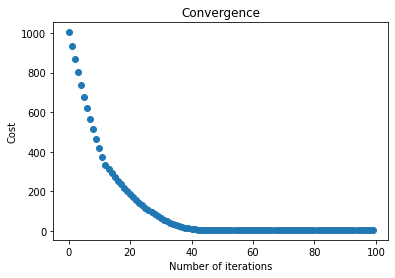

In [ ]:
#Model configurations
learningRate = 0.05
iterationsAmount = 100
#Number of datapoints
N = float(len(df)) 

#Training the multivariate linear regression model
stepwiseCosts, theta = gradientDescent(x_train, y_train, theta, learningRate, iterationsAmount,N)

#Plotting convergence
plt.figure()
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Convergence')
plt.scatter(x=list(range(0, iterationsAmount)), y=stepwiseCosts)
plt.show()

## • Evaluation

In [ ]:
#Testing the accuracy of model with r2_score

#hypothesis 
pred_y = theta*x_test 
pred_y = np.sum(pred_y, axis=1) 

from sklearn.metrics import r2_score
print('The r2 score is: ',r2_score(y_test,pred_y))

The r2 score is:  0.7052509363658976


## • Data preprocessing

---


In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Importing data set from UCI
dataFile = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv'

In [ ]:
# Read data from the file
data = pd.read_csv(dataFile,header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
1,2016-01-11 17:00:00,60,30,19.890000000000001,47.596666666666700,19.199999999999999,44.789999999999999,19.789999999999999,44.729999999999997,19.000000000000000,...,17.033333333333299,45.530000000000001,6.5999999999999996e+00,733.50000000000000,92.000000000000000,7.00000000000000000,63.0000000000000000,5.2999999999999998e+00,13.2754331571049988270,13.2754331571049988270
2,2016-01-11 17:10:00,60,30,19.890000000000001,46.693333333333300,19.199999999999999,44.722499999999997,19.789999999999999,44.789999999999999,19.000000000000000,...,17.066666666666698,45.560000000000002,6.4833333333333298e+00,733.60000000000002,92.000000000000000,6.66666666666666963,59.1666666666666998,5.2000000000000002e+00,18.6061949818395078182,18.6061949818395078182
3,2016-01-11 17:20:00,50,30,19.890000000000001,46.299999999999997,19.199999999999999,44.626666666666701,19.789999999999999,44.933333333333302,18.926666666666701,...,17.000000000000000,45.500000000000000,6.3666666666666698e+00,733.70000000000005,92.000000000000000,6.33333333333333037,55.3333333333333002,5.0999999999999996e+00,28.6426681675948202610,28.6426681675948202610
4,2016-01-11 17:30:00,50,40,19.890000000000001,46.066666666666698,19.199999999999999,44.590000000000003,19.789999999999999,45.000000000000000,18.890000000000001,...,17.000000000000000,45.399999999999999,6.2500000000000000e+00,733.79999999999995,92.000000000000000,6.00000000000000000,51.5000000000000000,5.0000000000000000e+00,45.4103894997388124466,45.4103894997388124466


In [ ]:
# Convert into Dataframe
df = pd.DataFrame(data)
# Remove Unwanted Columns
df.drop(df.iloc[:,3:21],inplace=True, axis =1)
df.drop([0, 1],inplace=True, axis =1)
# Remove Header
df.drop([0],inplace=True, axis = 0)
df.head()

,2,21,22,23,24,25,26,27,28
1,30,6.5999999999999996e+00,733.50000000000000,92.000000000000000,7.00000000000000000,63.0000000000000000,5.2999999999999998e+00,13.2754331571049988270,13.2754331571049988270
2,30,6.4833333333333298e+00,733.60000000000002,92.000000000000000,6.66666666666666963,59.1666666666666998,5.2000000000000002e+00,18.6061949818395078182,18.6061949818395078182
3,30,6.3666666666666698e+00,733.70000000000005,92.000000000000000,6.33333333333333037,55.3333333333333002,5.0999999999999996e+00,28.6426681675948202610,28.6426681675948202610
4,40,6.2500000000000000e+00,733.79999999999995,92.000000000000000,6.00000000000000000,51.5000000000000000,5.0000000000000000e+00,45.4103894997388124466,45.4103894997388124466
5,40,6.1333333333333302e+00,733.89999999999998,92.000000000000000,5.66666666666666963,47.6666666666666998,4.9000000000000004e+00,10.0840965518727898598,10.0840965518727898598


In [ ]:
# Convert values to float
df = df.astype(float)

In [ ]:
# Get shape of the data
df.shape

(19735, 9)

In [ ]:
# Get Infomation about data
df.info

<bound method DataFrame.info of          2          21     22         23        24         25         26  \
1      30.0   6.600000  733.5  92.000000  7.000000  63.000000   5.300000   
2      30.0   6.483333  733.6  92.000000  6.666667  59.166667   5.200000   
3      30.0   6.366667  733.7  92.000000  6.333333  55.333333   5.100000   
4      40.0   6.250000  733.8  92.000000  6.000000  51.500000   5.000000   
5      40.0   6.133333  733.9  92.000000  5.666667  47.666667   4.900000   
...     ...        ...    ...        ...       ...        ...        ...   
19731   0.0  22.733333  755.2  55.666667  3.333333  23.666667  13.333333   
19732   0.0  22.600000  755.2  56.000000  3.500000  24.500000  13.300000   
19733  10.0  22.466667  755.2  56.333333  3.666667  25.333333  13.266667   
19734  10.0  22.333333  755.2  56.666667  3.833333  26.166667  13.233333   
19735  10.0  22.200000  755.2  57.000000  4.000000  27.000000  13.200000   

              27         28  
1      13.275433  13.2754

In [ ]:
# Adding Bias to DataFrame
df = pd.concat([pd.Series(1, index=df.index, name="00"), df], axis = 1)

In [ ]:
# Preprocessed Data
print(df)

       00     2         21     22         23        24         25         26  \
1       1  30.0   6.600000  733.5  92.000000  7.000000  63.000000   5.300000   
2       1  30.0   6.483333  733.6  92.000000  6.666667  59.166667   5.200000   
3       1  30.0   6.366667  733.7  92.000000  6.333333  55.333333   5.100000   
4       1  40.0   6.250000  733.8  92.000000  6.000000  51.500000   5.000000   
5       1  40.0   6.133333  733.9  92.000000  5.666667  47.666667   4.900000   
...    ..   ...        ...    ...        ...       ...        ...        ...   
19731   1   0.0  22.733333  755.2  55.666667  3.333333  23.666667  13.333333   
19732   1   0.0  22.600000  755.2  56.000000  3.500000  24.500000  13.300000   
19733   1  10.0  22.466667  755.2  56.333333  3.666667  25.333333  13.266667   
19734   1  10.0  22.333333  755.2  56.666667  3.833333  26.166667  13.233333   
19735   1  10.0  22.200000  755.2  57.000000  4.000000  27.000000  13.200000   

              27         28  
1      13

In [ ]:
# Independent Variable is x
x = df.drop(columns=[21,22,23,24,25,26,27,28], axis=1)
x.head()

,00,2
1,1,30.0
2,1,30.0
3,1,30.0
4,1,40.0
5,1,40.0


In [ ]:
# Dependent variable
y = df.iloc[:,1]
y.head()

1    30.0
2    30.0
3    30.0
4    40.0
5    40.0
Name: 2, dtype: float64

In [ ]:
# Normalize the fetures
for i  in x.columns:
  maxValue = max(x[i])
  x[i] /= maxValue

In [ ]:
# Normalized data
x.head()

,00,2
1,1.0,0.428571
2,1.0,0.428571
3,1.0,0.428571
4,1.0,0.571429
5,1.0,0.571429


In [ ]:
# Split the dataset for testing and training
from sklearn.model_selection import train_test_split # Import necessary library
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.4, random_state=69)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11841, 2)
(7894, 2)
(11841,)
(7894,)


In [ ]:
# Initialized theta for cost function
theta = np.random.randint(100, size=(len(x.columns)))
theta

array([60, 68])

In [ ]:
def costFunction(x, y, theta, N):

    #hypothesis
    hx = theta*x  
    hx = np.sum(hx, axis=1)
    finalCost = np.sum((hx-y)**2)/(2*N)
    return finalCost

In [ ]:
def gradientDescent(x, y, theta, learningRate, iterationsAmount,N):

    #An array to record the cost at each itertion of the algorithm
    stepwiseCosts = [] 
    while (iterationsAmount>0): 

        #hypothesis   
        hx = theta*x  
        hx = np.sum(hx, axis=1) 
        
        #Updating all the theta values
        for j in range(0, len(x.columns)):
            theta[j] = theta[j] - (learningRate/N)*(sum((hx-y)*x.iloc[:,j]))

        #recording cost at each itertion to the above array
        stepwiseCosts.append(costFunction(x, y, theta,N)) 
        iterationsAmount-=1

    return stepwiseCosts, theta

## • Model fitting

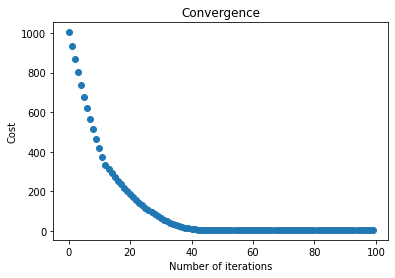

In [ ]:
#Model configurations
learningRate = 0.05
iterationsAmount = 100
#Number of datapoints
N = float(len(df)) 

#Training the multivariate linear regression model
stepwiseCosts, theta = gradientDescent(x_train, y_train, theta, learningRate, iterationsAmount,N)

#Plotting convergence
plt.figure()
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Convergence')
plt.scatter(x=list(range(0, iterationsAmount)), y=stepwiseCosts)
plt.show()

## • Evaluation

In [ ]:
#Testing the accuracy of model with r2_score

#hypothesis 
pred_y = theta*x_test 
pred_y = np.sum(pred_y, axis=1) 

from sklearn.metrics import r2_score
print('The r2 score is: ',r2_score(y_test,pred_y))

The r2 score is:  0.7052509363658976


# 2. Logistic Regression

## • Selection and a brief introduction to the data sets
---
The data set below was provided by the UCI ML Repository. Data was extracted using images obtained from fake and real banknote-like specimens. For digitisation, an industrial camera commonly used for print inspection was used. The final photos have 400 400 pixels. Grayscale images with a resolution of approximately 660 dpi were obtained, but this is dependent on the object lens and the distance to the item under investigation. The Wavelet Transform tool was used to extract features from photos.

Selected Dataset [http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt ](http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt)

### Information about the attribute:


---
* variation in the transformed Wavelet image (continuous)
* Scale of the Wavelet altered picture (continuous)
* curve of the Wavelet altered picture (continuous)
* picture entropy (continuous)
* class (integer)

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Importing data set from UCI
dataFile = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'

In [ ]:
# Read data from the file
data = pd.read_csv(dataFile,header=None)
data.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## • Data preprocessing

---


In [ ]:
# Independent Variable is x
x = data.drop(columns=3)
x.head()

,0,1,2,4
0,3.62160,8.6661,-2.8073,0
1,4.54590,8.1674,-2.4586,0
2,3.86600,-2.6383,1.9242,0
3,3.45660,9.5228,-4.0112,0
4,0.32924,-4.4552,4.5718,0


In [ ]:
# Dependent variable
y = data.iloc[:,4]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: 4, dtype: int64

In [ ]:
# Normalize the fetures
for i  in x.columns:
  maxValue = max(x[i])
  x[i] /= maxValue

In [ ]:
# Normalized data
x.head()

,0,1,2,4
0,0.530653,0.669114,-0.156593,0.0
1,0.666085,0.630609,-0.137142,0.0
2,0.566463,-0.203705,0.107333,0.0
3,0.506476,0.735261,-0.223747,0.0
4,0.048242,-0.343988,0.255017,0.0


In [ ]:
# Split the dataset for testing and training
from sklearn.model_selection import train_test_split # Import necessary library
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.4, random_state=69)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(823, 4)
(549, 4)
(823,)
(549,)


## • Model fitting

In [ ]:
# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

## • Evaluation

In [ ]:
pred = model.predict(x_test)

In [ ]:
# Calculate the accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

1.0

In [ ]:
# Evoluate from confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[309,   0],
       [  0, 240]])